In [7]:
# KNN Classification
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Import additional required libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
sns.set()

### Importing the dataset


In [10]:
zoo = read_csv('/content/Zoo.csv')

In [11]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [12]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
zoo.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [14]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [15]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [16]:
features = list(zoo.columns)
print(features)

['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


In [17]:
df = zoo.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


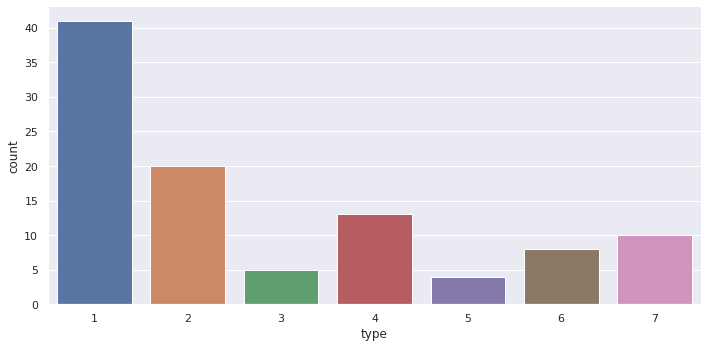

In [18]:
sns.factorplot('type', data=df, kind="count", size = 5, aspect = 2)

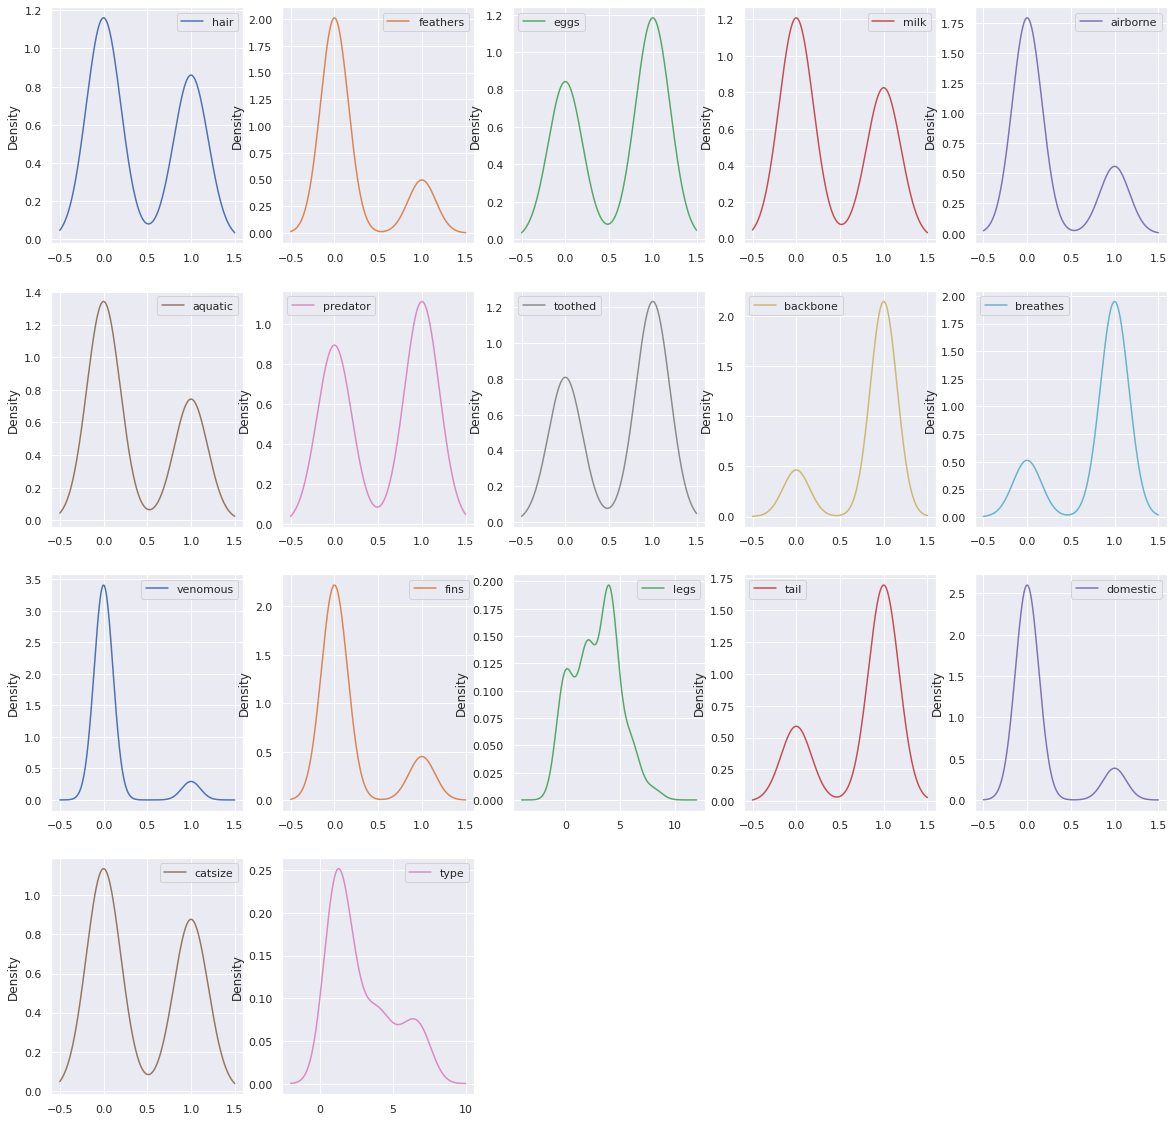

In [19]:
df.plot(kind='density', subplots=True, layout=(4,5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

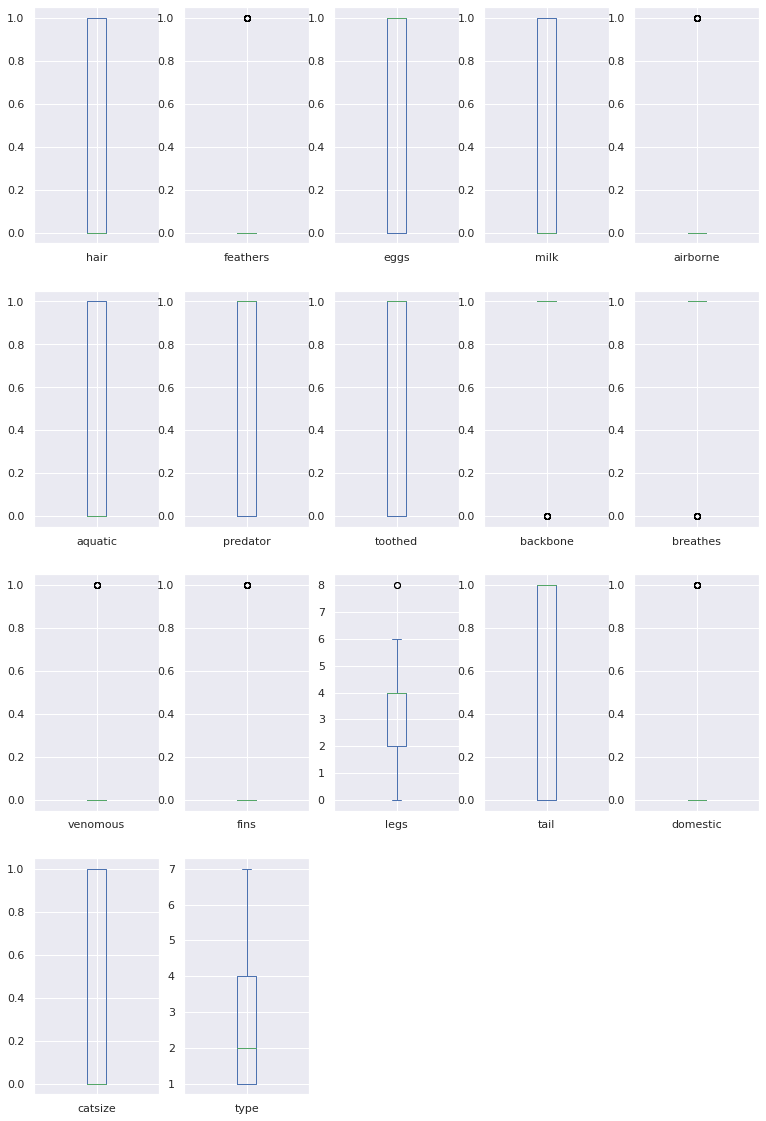

In [20]:
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

As shown above, majority of the variables are evenly distributed amongst the animals. However some of the variables like airbone, backbone, breathes, venomous, fins and domestic is not evenly distributed (i.e majority of animals either have these variable or don't).

In [21]:
# Finding the correlation between the variables in the dataset.

In [22]:
corr = df.corr(method='pearson')

In [23]:
corr.style.background_gradient(cmap='flare')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


# KNN Classification

Finding optimal number of K

In [24]:
df.shape

(101, 18)

In [25]:
X = df.iloc[:,1:17]
y = df.iloc[:,17]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [27]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [28]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

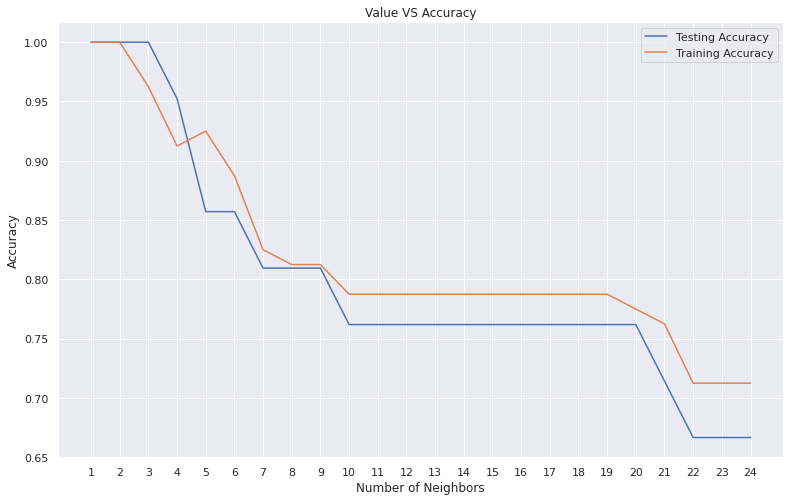

In [29]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()

plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

As shown in the graph, with K=4 we can achive accurary of 95%.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

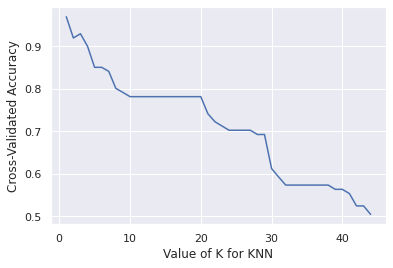

In [30]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 45
k_range = range(1, 45)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Applying Algorithm

In [33]:
knn = KNeighborsClassifier(n_neighbors=4)

In [34]:
knn.fit(X_train, y_train)
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [35]:
y_pred_KNeighborsClassifier = knn.predict(X_test)

In [36]:
def knn_alg(X_train, y_train, X_test, y_test, N):
    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(X_train, y_train)

    try:
        y_pred_KNeighborsClassifier = knn.predict(X_test)
    except NotFittedError as e:
        print(repr(e))

In [37]:
scores = []
cv_scores = []

In [38]:
score = accuracy_score(y_pred_KNeighborsClassifier, y_test)
scores.append(score)

In [41]:
score_knn=cross_val_score(knn, X,y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


In [42]:
score_knn.mean()

0.9200000000000002

In [43]:
score_knn.std()*2

0.07999999999999999

In [44]:
cv_score = score_knn.mean()

In [45]:
cv_scores.append(cv_score)

In [46]:
cv_scores

[0.9200000000000002]

Hence, the accuracy of the model is **Accuracy: 0.92 (+/- 0.079)** or 92% .